###### 导入模块

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from pprint import pprint
import os
import matplotlib.pyplot as plt

In [2]:
# 导入数据，将第四列解析为日期格式

df = pd.read_csv(r'./ChannelAttribute1 .csv',
                 parse_dates=[3])
# df = df_raw[df_raw['segment']=='Tier 4']

In [3]:
# 导入数据，将第四列解析为日期格式

df = pd.read_csv(r'./ChannelAttribute1 .csv',
                 parse_dates=[3])
# df = df_raw[df_raw['segment']=='Tier 4']

In [4]:
print(df)
df.head()

                id segment channel       date  pur_flag
0      20398764672  Tier 2      DM 2018-03-19         0
1      20408399343  Tier 2     WEB 2017-09-27         0
2      20438922645  Tier 2     WEB 2017-11-15         0
3      20225918468  Tier 2      DM 2017-05-24         0
4      20278581048  Tier 3      DM 2018-04-23         0
...            ...     ...     ...        ...       ...
81640  20436187235  Tier 2   PHONE 2017-10-13         0
81641  20070333013  Tier 1      DM 2017-09-19         1
81642  20176127503  Tier 3     WEB 2018-04-02         0
81643  20199812257  Tier 4      DM 2018-04-30         0
81644  20103645803  Tier 4     WEB 2018-01-12         0

[81645 rows x 5 columns]


,id,segment,channel,date,pur_flag
0,20398764672,Tier 2,DM,2018-03-19,0
1,20408399343,Tier 2,WEB,2017-09-27,0
2,20438922645,Tier 2,WEB,2017-11-15,0
3,20225918468,Tier 2,DM,2017-05-24,0
4,20278581048,Tier 3,DM,2018-04-23,0


###### 创建路径数据

In [5]:
def create_path_with_value(data, element):
    path = []
    path.append('start')
    df2 = data.loc[data['id'] == element, :].sort_values(['id', 'date'], ascending=[False, True])

    for i in range(len(df2)):
        path.append(df2.iloc[i]['channel'])

    if df2['pur_flag'].unique() == 1:
        path.append('conversion')
        conv = 1
        conv_null = 0
    else:
        path.append('null')
        conv = 0
        conv_null = 1
    return [path, conv, conv_null]


final_path, conv, conv_null = [], [], []
for element in df['id'].unique():
    rst = create_path_with_value(df, element)
    final_path.append(rst[0])
    conv.append(rst[1])
    conv_null.append(rst[2])


In [6]:
print(df.loc[df['id'] == 20438922645, :].sort_values(['id', 'date'], ascending=[False, True]))
dfxx=df.loc[df['id'] == 20438922645, :].sort_values('date', ascending=True)


                id segment channel       date  pur_flag
2      20438922645  Tier 2     WEB 2017-11-15         0
74881  20438922645  Tier 2      EM 2017-11-24         0
9352   20438922645  Tier 2      DM 2018-04-30         0


In [7]:

if dfxx['pur_flag'].unique() == 0:
    print("vbfh")
dfxx['pur_flag'] == 0

vbfh


2        True
74881    True
9352     True
Name: pur_flag, dtype: bool

In [8]:
# 路径数据
path_data = pd.DataFrame({'path': final_path, 'conv': conv, 'conv_nulls': conv_null})
path_data

,path,conv,conv_nulls
0,"[start, WEB, EM, DM, null]",0,1
1,"[start, EM, WEB, DM, null]",0,1
2,"[start, WEB, EM, DM, null]",0,1
3,"[start, DM, EM, WEB, null]",0,1
4,"[start, EM, WEB, DM, null]",0,1
...,...,...,...
28936,"[start, DM, conversion]",1,0
28937,"[start, WEB, conversion]",1,0
28938,"[start, DM, conversion]",1,0
28939,"[start, WEB, conversion]",1,0


###### 归因分析（最后一次点击、第一次点击和线性模型）

In [16]:
def create_last_click_stats_pair(data):
    temp_path, temp_conv = [], []
    for i in range(len(data)):
        temp_path.append(data.iloc[i]['path'][-2])
        temp_conv.append(data.iloc[i]['conv'])
    return pd.DataFrame({'touch': temp_path, 'Last_Conv': temp_conv})


def create_first_order_states_pair(data):
    temp_path, temp_conv = [], []
    for i in range(len(data)):
        temp_path.append(data.iloc[i]['path'][1])
        temp_conv.append(data.iloc[i]['conv'])
    return pd.DataFrame({'touch': temp_path, 'First_Conv': temp_conv})


def create_linear_click_stats_pair(data):
    temp_path, temp_conv = [], []
    for i in range(len(data)):
        if len(data.iloc[i]['path'])==6:
            for j in range(1,5):
                temp_path.append(data.iloc[i]['path'][j])
                temp_conv.append(data.iloc[i]['conv'] / (6 - 2))
        elif len(data.iloc[i]['path'])==5:
            for j in range(1,4):
                temp_path.append(data.iloc[i]['path'][j])
                temp_conv.append(data.iloc[i]['conv'] / (5 - 2))
        elif len(data.iloc[i]['path'])==4:
            for j in range(1,3):
                temp_path.append(data.iloc[i]['path'][j])
                temp_conv.append(data.iloc[i]['conv'] / (4 - 2))
        else:
            for j in range(1, 2):
                temp_path.append(data.iloc[i]['path'][j])
                temp_conv.append(data.iloc[i]['conv'] / (3 - 2))
    return pd.DataFrame({'touch': temp_path, 'Linear_Conv': temp_conv})

In [ ]:
# create_last_click_stats_pair(path_data)

len(path_data.iloc[3]['path'])==6
path_data['path'].map(lambda x:len(x))
pd.get_option('display.max_rows')
pd.set_option('display.max_rows',1000)
line=create_linear_click_stats_pair(path_data).head(1000)
line

In [ ]:
create_linear_click_stats_pair(path_data).groupby('touch')['Linear_Conv'].sum()

In [ ]:
last_touch = create_last_click_stats_pair(path_data).groupby('touch')['Last_Conv'].sum().reset_index()
linear_touch = create_linear_click_stats_pair(path_data).groupby('touch')['Linear_Conv'].sum().reset_index()
first_touch = create_first_order_states_pair(path_data).groupby('touch')['First_Conv'].sum().reset_index()
# r i in range(len(data)):
#         if len(data.iloc[i]['path'])==6:
#             for j in range(1,5):
#                 temp_path.append(data.iloc[i]['path'][j])
#                 temp_conv.append(data.il
# # DM=1/sum(EM)*sum(conv)
# 537	EM	0.333333
# 538	WEB	0.333333
# 539	DM	0.333333
# 相加等于1/cfdvsffffg

In [ ]:

linear_touch.set_index('touch')
# linear_touch.set_index('touch')

In [ ]:
lst = last_touch.set_index('touch').iloc[:, 0:].apply(lambda x: x / x.sum())
li = linear_touch.set_index('touch').iloc[:, 0:].apply(lambda x: x / x.sum())
fst = first_touch.set_index('touch').iloc[:, 0:].apply(lambda x: x / x.sum())

In [ ]:
dfs = [fst, lst, li]
dfs = [df for df in dfs]
dfs[0].join(dfs[1:])

###### 计算渠道的移除效应

In [ ]:
def channel_remove(data,channel_removed):
    state_pairs, values = [], []
    for i in range(len(data)):
        for j, z in zip(data[i][0], data[i][1]):
            state_pairs.append(j)
            values.append(z)
    temp_df = pd.DataFrame({'state_pairs': state_pairs, 'values': values})
    grp_df = temp_df.groupby('state_pairs')['values'].sum().reset_index()
    grp_df[['start', 'end']] = grp_df['state_pairs'].apply(pd.Series)
    temp = grp_df.copy()
    grp_df['start'] = grp_df['start'].replace(channel_removed, 'unknown')
    grp_df['end'] = grp_df['end'].replace(channel_removed, 'unknown')
    return [grp_df, temp]


# 筛选出成功转化路径

path_data_pur = path_data[path_data['conv']==1]
temps = split_states(path_data_pur)

conversion =[]
columns = ['start', 'end', 'values_x', 'values_y', 'perct']

# 所有渠道
channels_list = list(df['channel'].unique())

df_dummy1 = pd.DataFrame({'start': ['start', 'conversion', 'null'],
                          'end': ['start', 'conversion', 'null'],
                          'values_x': [0, 0, 0],
                          'values_y': [0, 0, 0],
                          'perct': [0, 1, 1]})
dy_dummy = pd.DataFrame(df_dummy1, columns=columns)


df_dummy2 = pd.DataFrame({'start': ['start', 'conversion', 'null'],
                         'end': ['start', 'conversion', 'null']})

# 逐个计算移除单个渠道后的总转化数

for chnl in channels_list:
    df_remove = channel_remove(temps, chnl)[0]
    
    df_noremove = channel_remove(temps, chnl)[1]
    
    df_temp = df_remove.groupby('start')['values'].sum().reset_index()
#     print(df_temp)
    df_temp = pd.merge(df_remove, df_temp, on='start', how='left')
    print(df_temp,"mergev(values_ygroupby start")
    df_temp['perct'] = df_temp['values_x']/df_temp['values_y']
    
    df_temp = pd.DataFrame(df_temp, columns=columns)

    df_temp = pd.concat([df_temp, dy_dummy], axis=0)
    
    df_ini = pd.DataFrame(df_noremove, columns=['start', 'end'])
    
    df_temp2 = pd.concat([df_ini, df_dummy2], axis=0)
    print(df_temp2,"zuobian")
    df_temp = pd.merge(df_temp2, df_temp, on=['start', 'end'], how='left')
    print(df_temp,"vfgghhhhbcvvggg'n'cggh'm")
    print("dvfgvg通过start,end join把end=null的join不上了dbghncbhnkl;'jkl")
#     用0填充由于左连接出现的NaN
#     df_temp['values_x'].fillna(0, inplace=True)
#     df_temp['values_y'].fillna(0, inplace=True)
#     df_temp['perct'].fillna(0, inplace=True)

    df_trans1 = pd.crosstab(df_temp['start'], df_temp['end'], values=df_temp['perct'], aggfunc=np.sum)
    print("dsfghhjj")
    df_trans1.update(df_trans1[['DM', 'EM', 'PHONE', 'WEB', 'conversion', 'null', 'start']].fillna(0))
    
#     转化为numpy矩阵
    df_trans_mat = np.matrix(df_trans1)
    print(df_trans1)
    print("=======")
    inist_n1 = pd.crosstab(df_temp['start'], df_temp['end'], values=df_temp['values_x'], aggfunc=np.sum)
    inist_n1.update(inist_n1[['DM', 'EM', 'PHONE', 'WEB', 'conversion', 'null', 'start']].fillna(0))
    print(inist_n1)
    inist_mat = np.matrix(inist_n1.iloc[-1])
    
#     矩阵乘积
    mat = inist_mat*df_trans_mat
    print(mat,'start(iloc(-1->DM      EM  PHONE     WEB  conversion  null  start')
    print(mat[0,4])
# 取出估计出来的转化数
    conversion.append(mat[0,4])


# 计算单个渠道的移除效应
chnl_conversion = pd.DataFrame({'channel': channels_list, 'conv': conversion})

df_remove = channel_remove(temps, chnl)[0]
df_noremove = channel_remove(temps, chnl)[1]
tot_conv = df_remove['values'].sum()
print(df_remove)
chnl_conversion['impact'] = (tot_conv-chnl_conversion['conv'])/tot_conv
print(chnl_conversion,tot_conv)
print("impact=['values']路径总条数-remove后转化数/['values']路径总条数")
tot_impact = chnl_conversion['impact'].sum()

chnl_conversion['convet_rate']= chnl_conversion['impact']/tot_impact

chnl_conversion


In [ ]:
(start, PHONE)     761 

In [33]:
list(df['channel'].unique())
conversion,chnl_conversion

NameError: name 'conversion' is not defined

###### 马尔科夫链

In [29]:
# 手动计算状态转移矩阵
def split_states(data):
    temp_data = []
    for i in range(len(data)):
        path = data.iloc[i]['path']
        state_pairs, values = [], []
        for j in range(len(path)-1):
            state_pairs.append((path[j], path[j+1]))
            values.append(1)

        temp_data.append([state_pairs, values])
    return temp_data

def transition_maxtrix(data):
    state_pairs, values = [], []
    for i in range(len(data)):
        for j, z in zip(data[i][0], data[i][1]):
            state_pairs.append(j)
            values.append(z)
    temp_df = pd.DataFrame({'state_pairs': state_pairs, 'values': values})
    print(temp_df,"temp_dftemp_df")
    grp_df = temp_df.groupby('state_pairs')['values'].sum().reset_index()
    print(grp_df,"grp_df1")
    grp_df[['start', 'end']] = grp_df['state_pairs'].apply(pd.Series)
    print(grp_df,"grp_d22")
    table = pd.crosstab(grp_df['end'], grp_df['start'], values=grp_df['values'], aggfunc=np.sum, normalize='columns')\
        .applymap(lambda x: "{:3.2f}".format(x))
    return table

In [30]:
split_states(path_data)


[[[('start', 'WEB'), ('WEB', 'EM'), ('EM', 'DM'), ('DM', 'null')],
  [1, 1, 1, 1]],
 [[('start', 'EM'), ('EM', 'WEB'), ('WEB', 'DM'), ('DM', 'null')],
  [1, 1, 1, 1]],
 [[('start', 'WEB'), ('WEB', 'EM'), ('EM', 'DM'), ('DM', 'null')],
  [1, 1, 1, 1]],
 [[('start', 'DM'), ('DM', 'EM'), ('EM', 'WEB'), ('WEB', 'null')],
  [1, 1, 1, 1]],
 [[('start', 'EM'), ('EM', 'WEB'), ('WEB', 'DM'), ('DM', 'null')],
  [1, 1, 1, 1]],
 [[('start', 'PHONE'),
   ('PHONE', 'EM'),
   ('EM', 'DM'),
   ('DM', 'WEB'),
   ('WEB', 'null')],
  [1, 1, 1, 1, 1]],
 [[('start', 'PHONE'), ('PHONE', 'WEB'), ('WEB', 'DM'), ('DM', 'null')],
  [1, 1, 1, 1]],
 [[('start', 'DM'), ('DM', 'PHONE'), ('PHONE', 'WEB'), ('WEB', 'null')],
  [1, 1, 1, 1]],
 [[('start', 'WEB'), ('WEB', 'EM'), ('EM', 'DM'), ('DM', 'conversion')],
  [1, 1, 1, 1]],
 [[('start', 'PHONE'), ('PHONE', 'WEB'), ('WEB', 'DM'), ('DM', 'null')],
  [1, 1, 1, 1]],
 [[('start', 'EM'), ('EM', 'WEB'), ('WEB', 'DM'), ('DM', 'null')],
  [1, 1, 1, 1]],
 [[('start', 'WEB

In [31]:
# 输出状态转移矩阵
temps = split_states(path_data)
tmp = transition_maxtrix(temps)
tmp1 = tmp.transpose()

              state_pairs  values
0            (start, WEB)       1
1               (WEB, EM)       1
2                (EM, DM)       1
3              (DM, null)       1
4             (start, EM)       1
...                   ...     ...
110581   (DM, conversion)       1
110582       (start, WEB)       1
110583  (WEB, conversion)       1
110584        (start, DM)       1
110585   (DM, conversion)       1

[110586 rows x 2 columns] temp_dftemp_df
            state_pairs  values
0              (DM, EM)    2444
1           (DM, PHONE)     327
2             (DM, WEB)    3310
3      (DM, conversion)    6002
4            (DM, null)   16043
5              (EM, DM)    7597
6           (EM, PHONE)     409
7             (EM, WEB)    7232
8      (EM, conversion)     789
9            (EM, null)    1603
10          (PHONE, DM)    1963
11          (PHONE, EM)    1150
12         (PHONE, WEB)    7411
13  (PHONE, conversion)     119
14        (PHONE, null)     113
15            (WEB, DM)   14519
16    

In [32]:
tmp1,tmp

(end      DM    EM PHONE   WEB conversion  null
 start                                         
 DM     0.00  0.09  0.01  0.12       0.21  0.57
 EM     0.43  0.00  0.02  0.41       0.04  0.09
 PHONE  0.18  0.11  0.00  0.69       0.01  0.01
 WEB    0.58  0.22  0.03  0.00       0.05  0.12
 start  0.14  0.29  0.32  0.25       0.00  0.00,
 start         DM    EM PHONE   WEB start
 end                                     
 DM          0.00  0.43  0.18  0.58  0.14
 EM          0.09  0.00  0.11  0.22  0.29
 PHONE       0.01  0.02  0.00  0.03  0.32
 WEB         0.12  0.41  0.69  0.00  0.25
 conversion  0.21  0.04  0.01  0.05  0.00
 null        0.57  0.09  0.01  0.12  0.00)

###### 可视化马尔科夫链

In [26]:
states = ['start', 'DM', 'EM', 'PHONE', 'WEB', 'conversion', 'null']

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

In [36]:
edges_wts = _get_markov_edges(tmp1)
edges_wts

{('DM', 'DM'): '0.00',
 ('EM', 'DM'): '0.43',
 ('PHONE', 'DM'): '0.18',
 ('WEB', 'DM'): '0.58',
 ('start', 'DM'): '0.14',
 ('DM', 'EM'): '0.09',
 ('EM', 'EM'): '0.00',
 ('PHONE', 'EM'): '0.11',
 ('WEB', 'EM'): '0.22',
 ('start', 'EM'): '0.29',
 ('DM', 'PHONE'): '0.01',
 ('EM', 'PHONE'): '0.02',
 ('PHONE', 'PHONE'): '0.00',
 ('WEB', 'PHONE'): '0.03',
 ('start', 'PHONE'): '0.32',
 ('DM', 'WEB'): '0.12',
 ('EM', 'WEB'): '0.41',
 ('PHONE', 'WEB'): '0.69',
 ('WEB', 'WEB'): '0.00',
 ('start', 'WEB'): '0.25',
 ('DM', 'conversion'): '0.21',
 ('EM', 'conversion'): '0.04',
 ('PHONE', 'conversion'): '0.01',
 ('WEB', 'conversion'): '0.05',
 ('start', 'conversion'): '0.00',
 ('DM', 'null'): '0.57',
 ('EM', 'null'): '0.09',
 ('PHONE', 'null'): '0.01',
 ('WEB', 'null'): '0.12',
 ('start', 'null'): '0.00'}

In [37]:
# 移除0转化概率的边
for key, value in list(edges_wts.items()):
    if value == '0.00':
        edges_wts.pop(key)

pprint(edges_wts)

{('DM', 'EM'): '0.09',
 ('DM', 'PHONE'): '0.01',
 ('DM', 'WEB'): '0.12',
 ('DM', 'conversion'): '0.21',
 ('DM', 'null'): '0.57',
 ('EM', 'DM'): '0.43',
 ('EM', 'PHONE'): '0.02',
 ('EM', 'WEB'): '0.41',
 ('EM', 'conversion'): '0.04',
 ('EM', 'null'): '0.09',
 ('PHONE', 'DM'): '0.18',
 ('PHONE', 'EM'): '0.11',
 ('PHONE', 'WEB'): '0.69',
 ('PHONE', 'conversion'): '0.01',
 ('PHONE', 'null'): '0.01',
 ('WEB', 'DM'): '0.58',
 ('WEB', 'EM'): '0.22',
 ('WEB', 'PHONE'): '0.03',
 ('WEB', 'conversion'): '0.05',
 ('WEB', 'null'): '0.12',
 ('start', 'DM'): '0.14',
 ('start', 'EM'): '0.29',
 ('start', 'PHONE'): '0.32',
 ('start', 'WEB'): '0.25'}


Nodes:
{G.nodes()}

Edges:
OutMultiEdgeDataView([('start', 'DM', {'weight': '0.14', 'label': '0.14'}), ('start', 'EM', {'weight': '0.29', 'label': '0.29'}), ('start', 'PHONE', {'weight': '0.32', 'label': '0.32'}), ('start', 'WEB', {'weight': '0.25', 'label': '0.25'}), ('DM', 'EM', {'weight': '0.09', 'label': '0.09'}), ('DM', 'PHONE', {'weight': '0.01', 'label': '0.01'}), ('DM', 'WEB', {'weight': '0.12', 'label': '0.12'}), ('DM', 'conversion', {'weight': '0.21', 'label': '0.21'}), ('DM', 'null', {'weight': '0.57', 'label': '0.57'}), ('EM', 'DM', {'weight': '0.43', 'label': '0.43'}), ('EM', 'PHONE', {'weight': '0.02', 'label': '0.02'}), ('EM', 'WEB', {'weight': '0.41', 'label': '0.41'}), ('EM', 'conversion', {'weight': '0.04', 'label': '0.04'}), ('EM', 'null', {'weight': '0.09', 'label': '0.09'}), ('PHONE', 'DM', {'weight': '0.18', 'label': '0.18'}), ('PHONE', 'EM', {'weight': '0.11', 'label': '0.11'}), ('PHONE', 'WEB', {'weight': '0.69', 'label': '0.69'}), ('PHONE', 'conversion', {'weig

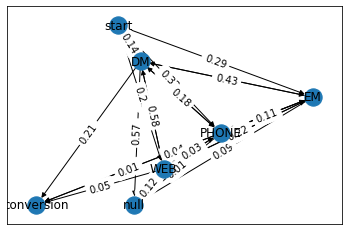

In [38]:
# 用networkx绘制马尔科夫链

# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

G = nx.MultiDiGraph()

# 增加节点状态
G.add_nodes_from(states)
print('Nodes:\n{G.nodes()}\n')

# 边表示转换概率
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print('Edges:')
pprint(G.edges(data=True))

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

# 创建边标签
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'customer_markov.dot')